# Rainfalls in Australia

In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import sys
import csv
import os

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as ss
import scipy.stats as st

from signet.cluster import Cluster
import signet.utils as ut
from signet.utils import objscore
import matplotlib
from mpl_toolkits.basemap import Basemap

In [7]:
ls

200_0_80_10_1000.pk              monthly_uncompressed/
200_10_80_10_200.pk              plus_cc.npz
create_label_and_analysis.ipynb  RAINadjLbar_GE.png
labels6SPONGE.npy                rainfall_anaysis.ipynb
minus_cc.npz                     temperature_anaysis.ipynb


In [3]:
direc = 'monthly_uncompressed/'

In [4]:
files = os.listdir(direc)

In [5]:
#files

In [6]:
stat_lat_lon = []

with open(direc + 'HQMR_stations.txt','r') as f:
    for line in f:
        stat_lat_lon.append(line.split(' ')[0:3])


In [7]:

datal = []
for i, file in enumerate(files):
    if file[-5:] =='h.txt':
        data = pd.read_csv(direc+file, sep='   ', parse_dates=[])
        datal.append(data)

/research/cbim/vast/yt219/anaconda3/envs/pytorch16/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [8]:
datal[0].head()

,PRCP,Unnamed: 1,018069 18820101 20180131 missing_value=99999.9 ELLISTON
0,18820101 18820131,25.4,NaN
1,18820201 18820228,0.0,NaN
2,18820301 18820331,2.0,NaN
3,18820401 18820430,69.3,NaN
4,18820501 18820531,50.0,NaN


In [9]:
datal[0].columns

Index(['PRCP', 'Unnamed: 1',
       ' 018069 18820101 20180131 missing_value=99999.9 ELLISTON'],
      dtype='object')

In [10]:
# inde of stations
stations = []
for d in datal:
    c = d.columns[2].split()[0]
    stations.append(c)

In [11]:
d.columns[2]

" 083032 18890201 20170630 missing_value=99999.9 WHITLANDS (BURDER'S LANE)"

In [12]:
# drop useless columns

for d in datal:
    
    d.drop(columns=[d.columns[2]], inplace = True)

In [13]:
datal[0].head()

,PRCP,Unnamed: 1
0,18820101 18820131,25.4
1,18820201 18820228,0.0
2,18820301 18820331,2.0
3,18820401 18820430,69.3
4,18820501 18820531,50.0


In [14]:
# rename columns
for i,d in enumerate(datal):
    d.columns=["Date", "Rain_"+stations[i]]

In [20]:

#for d in datal:
#    d.Date = pd.to_datetime(d.Date, format = '%Y%m%d')

In [21]:
# set time index
#for d in datal:
#    d.set_index('Date', inplace = True)

In [22]:
#plt.figure()
#datal[13].plot()

In [15]:
datal[0].head()

,Date,Rain_018069
0,18820101 18820131,25.4
1,18820201 18820228,0.0
2,18820301 18820331,2.0
3,18820401 18820430,69.3
4,18820501 18820531,50.0


In [16]:
merge = datal[0]
for i in range(1, len(datal)):
    merge = pd.merge(merge, datal[i], on = 'Date', how = 'inner')
    #merge = pd.merge_asof(merge, datal[i], on = 'Date', left_index=True, right_index=True, direction='nearest')

In [17]:
merge.head()

,Date,Rain_018069,Rain_054004,Rain_014015,Rain_086131,Rain_014825,Rain_004006,Rain_085096,Rain_012011,Rain_045017,...,Rain_016005,Rain_062026,Rain_005014,Rain_007049,Rain_038002,Rain_090135,Rain_010149,Rain_087034,Rain_025507,Rain_083032
0,19690801 19690831,15.3,32.9,0.0,29.7,0.0,0.0,66.2,11.7,3.5,...,39.6,86.4,0.0,0.0,0.3,67.9,7.9,54.2,29.4,75.8
1,19690901 19690930,38.7,48.9,18.8,65.0,0.0,0.0,148.0,11.2,19.8,...,14.2,27.8,0.0,0.0,4.3,86.5,14.5,48.2,54.8,151.8
2,19691001 19691031,3.8,111.1,170.7,19.8,97.6,0.0,36.8,0.0,9.9,...,35.3,123.0,6.4,0.0,2.3,35.4,0.0,16.4,16.1,52.6
3,19691101 19691130,19.6,102.6,40.9,46.7,22.4,0.0,91.4,24.7,0.0,...,0.0,166.0,0.0,0.0,0.3,31.4,8.9,35.0,22.7,66.4
4,19691201 19691231,4.0,99.0,160.4,49.7,74.7,8.6,39.9,0.0,0.5,...,6.7,34.2,0.0,0.0,13.3,29.7,0.6,27.3,31.9,79.3


## Clustering and plot results

In [18]:
Aps = ss.load_npz('plus_cc.npz')
Ams = ss.load_npz('minus_cc.npz')
m = Cluster((Aps, Ams))

(array([58.,  0., 45.,  0., 52.,  0., 63.,  0., 21., 67.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

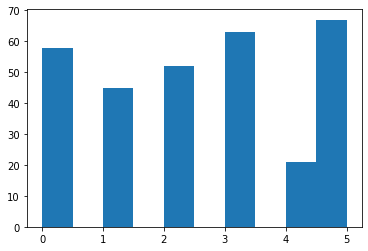

In [27]:
labels = np.load('../../logs/rainfall/200_10_90_10_1000/05-18-05:30:23/SSSNET_L_pred_latest6.npy')
plt.hist(labels)

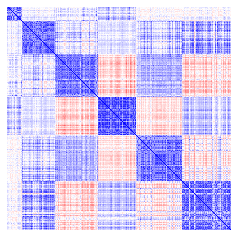

In [28]:
filename='RAINadjLbar'
k=6
preds=labels


x=ut.sizeorder(preds,k,m.p,m.n,True)
ssortedp = m.p.todense()[x,:][:,x]
ssortedn = m.n.todense()[x,:][:,x]
#ax = plot_dense_matrix(ssortedp-ssortedn)
ax=plt.matshow(ssortedp-ssortedn,cmap='bwr_r',vmin=-1,vmax=1)
plt.axis('off')
plt.savefig(filename+'_GE.png', dpi = max(500,min(ssortedp.shape[0]/15,1500)), bbox_inches='tight', pad_inches = 0.25);

In [25]:
stat_lat_lon_a = np.array(stat_lat_lon, dtype = float)
stations_a = np.array(stations, dtype = float)
grouped_coords = []

for i in range(k):
    i_stations = stations_a[preds==i]
    i_coords = []
    
    
    for s in i_stations:
        idx = np.where(stat_lat_lon_a[:,0] == s)
        i_coords.append(stat_lat_lon_a[idx])
    grouped_coords.append(i_coords)

/research/cbim/vast/yt219/anaconda3/envs/pytorch16/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


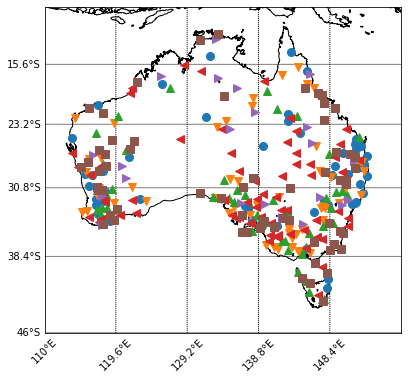

In [29]:
from mpl_toolkits.basemap import Basemap
cmap = matplotlib.cm.get_cmap('tab10')
markers_ = ['o', 'v', '^', '<', '>',  's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '8']
# input desired coordinates
my_coords = stat_lat_lon_a[0, 1:3]

# How much to zoom from coordinates (in degrees)
zoom_scale = 20

# Setup the bounding box for the zoom and bounds of the map
bbox = [-46, -8, 110, 158]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
mm = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
mm.drawcoastlines()
#m.fillcontinents()


# draw parallels, meridians, and color boundaries
mm.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
mm.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
#m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
colors = ['r', 'g', 'b', 'c', 'y']
markers = []
for i in range(k):
    coords = np.array(grouped_coords[i])[:, 0, 1:3]
    x,y = mm(coords[:,1],coords[:,0])
    mm.plot(x,y, color = cmap(i), markersize=8, lw = 0, marker = markers_[i])



#plt.title("Geographic Point Test")
#plt.tight_layout()
plt.margins(x=0.1)
#plt.savefig('Rainfall_monthly_BH.png', format='png', dpi=500)
plt.savefig('Rainfall_monthly_GE.pdf',  bbox_inches='tight')

plt.show()

In [129]:
Aps.shape

(306, 306)

In [8]:
# np.save('labels6SPONGE',labels)

In [24]:
cuts = np.load('../../result_arrays/rainfall/balanced_cuts100_200_50_0_0_10_3200_10_0_10_5000_L_SSSNET.npy')

In [25]:
cuts

array([[[2.52e+01, 3.35e-01, 3.99e-02]],

       [[2.63e+01, 3.48e-01, 4.11e-02]],

       [[1.91e+01, 2.59e-01, 3.14e-02]],

       [[2.02e+01, 2.72e-01, 3.18e-02]],

       [[2.41e+01, 3.21e-01, 3.86e-02]],

       [[2.41e+01, 3.21e-01, 3.86e-02]],

       [[1.80e+01, 2.43e-01, 2.90e-02]],

       [[1.99e+01, 2.68e-01, 3.13e-02]],

       [[7.37e+01, 9.93e-01, 5.61e-02]],

       [[2.50e+01, 3.32e-01, 3.96e-02]]])

In [20]:
all_ARI = np.load('../../result_arrays/rainfall/all_latest0_200_50_10_0_1_3200_10_0_10_5000_L_SpectralSSSNET.npy')

In [21]:
all_ARI[:,-1]

array([0.68, 0.83, 0.87, 0.83, 0.85, 0.87, 0.89, 0.77, 0.89, 0.79])